In [21]:
from dataclasses import dataclass
import erdantic as erd

In [22]:
from model.initial_conditions import InitialConditions
from model.extraction.energy_use import EnergyConsumption
from model.transformation.commodity_production import CommodityProduction
from model.transformation.decision_making import DecisionMaking
# from model.transformation.social_services import SocialServices
from model.dissipation.accumulation import Accumulation

In [23]:
@dataclass
class Extraction:
    energy_use: EnergyConsumption


@dataclass
class Transformation:
    commodity_production: CommodityProduction
    decision_making: DecisionMaking
    # social_services: SocialServices


@dataclass
class Dissipation:
    accumulation: Accumulation


@dataclass
class Provisioning:
    initial_conditions: InitialConditions
    extraction: Extraction
    transformation: Transformation
    dissipation: Dissipation

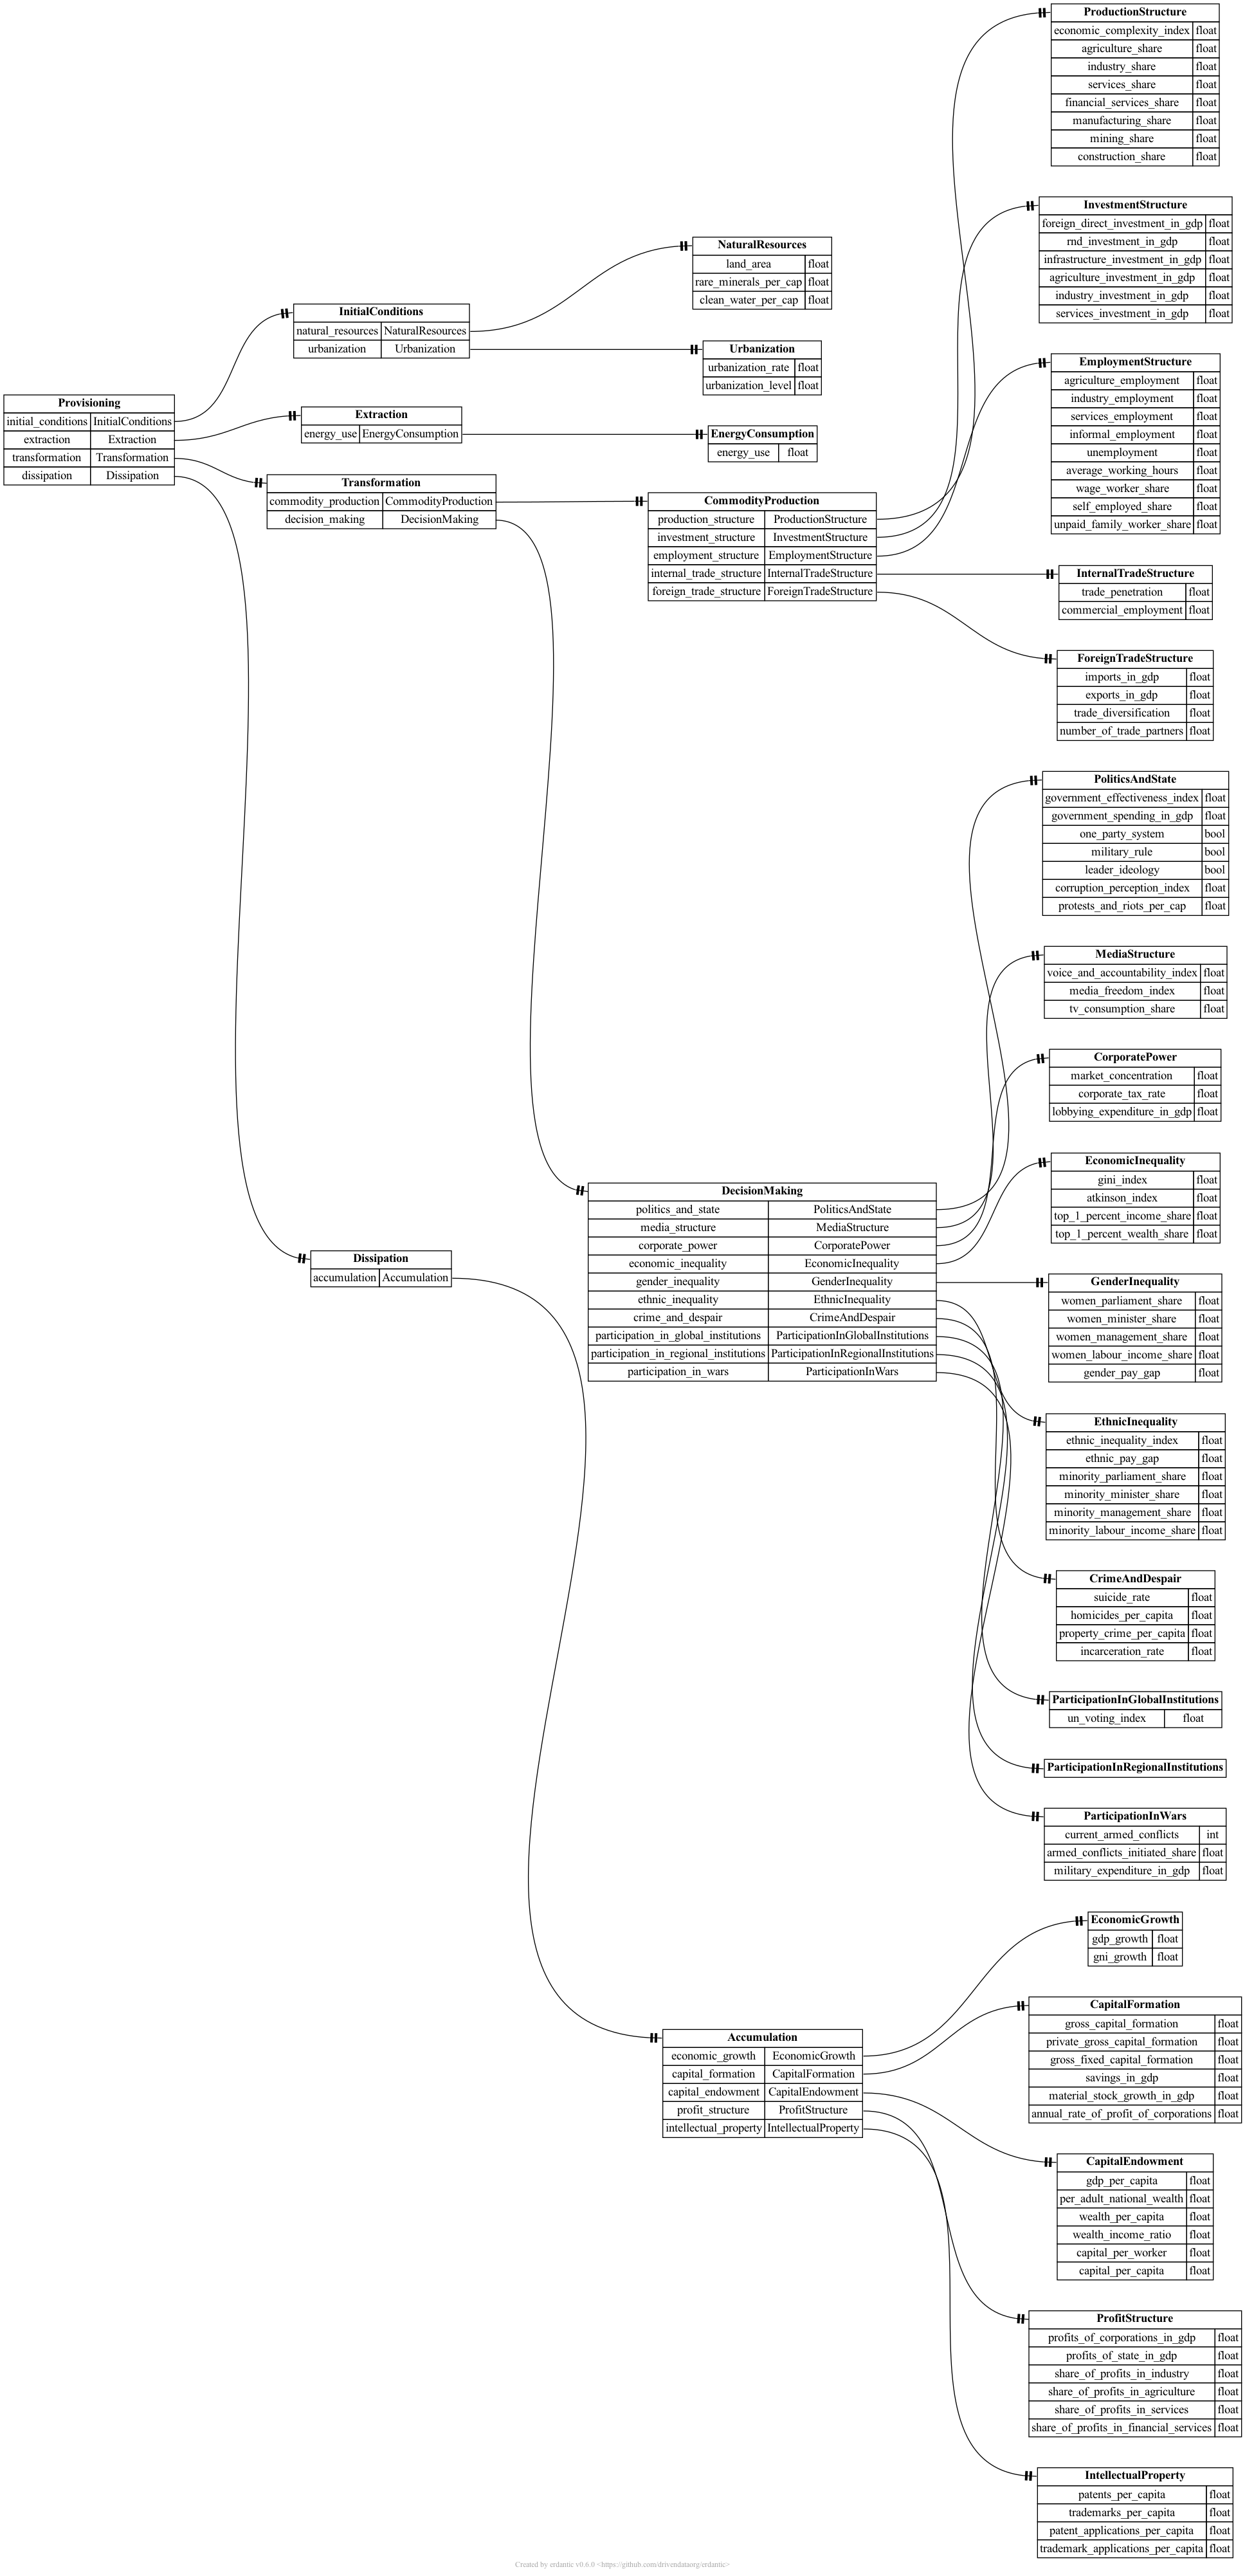

In [24]:
provisioning_diagram = erd.create(Provisioning)
provisioning_diagram